# Plot all RSMD data

In [1]:
import os
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_folder = "data/md_traj_analysis/"

In [3]:
files = glob.glob(data_folder+'*rmsd_C-alpha.xvg')

In [4]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

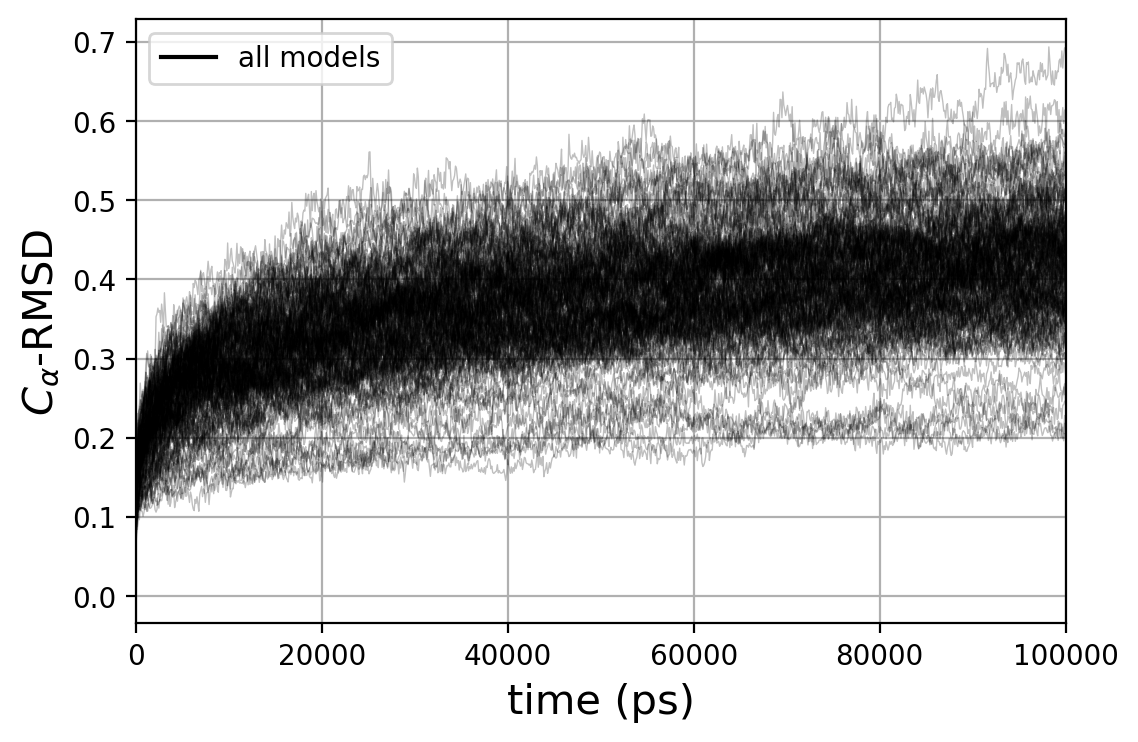

In [10]:
fig,ax = plt.subplots(1,1,dpi=200)

for path in files:
    data = [clean_line(l)  for l in open(path,'r').readlines() if exclude_regex(l)]
    data = np.array(data)
    
    ax.plot(*data.T,color="k",lw=0.5,alpha=0.25)

ax.plot([],[],color="k",label="all models")
    
ax.set_xlabel("time (ps)", fontsize=15)
ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=15)

ax.set_xlim(0,100000)

ax.legend(loc="best",fontsize=10)
ax.grid(True)
plt.show()

# Plot RMSD per mutant

In [11]:
data_folder = "data/md_traj_analysis/"

In [13]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [16]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

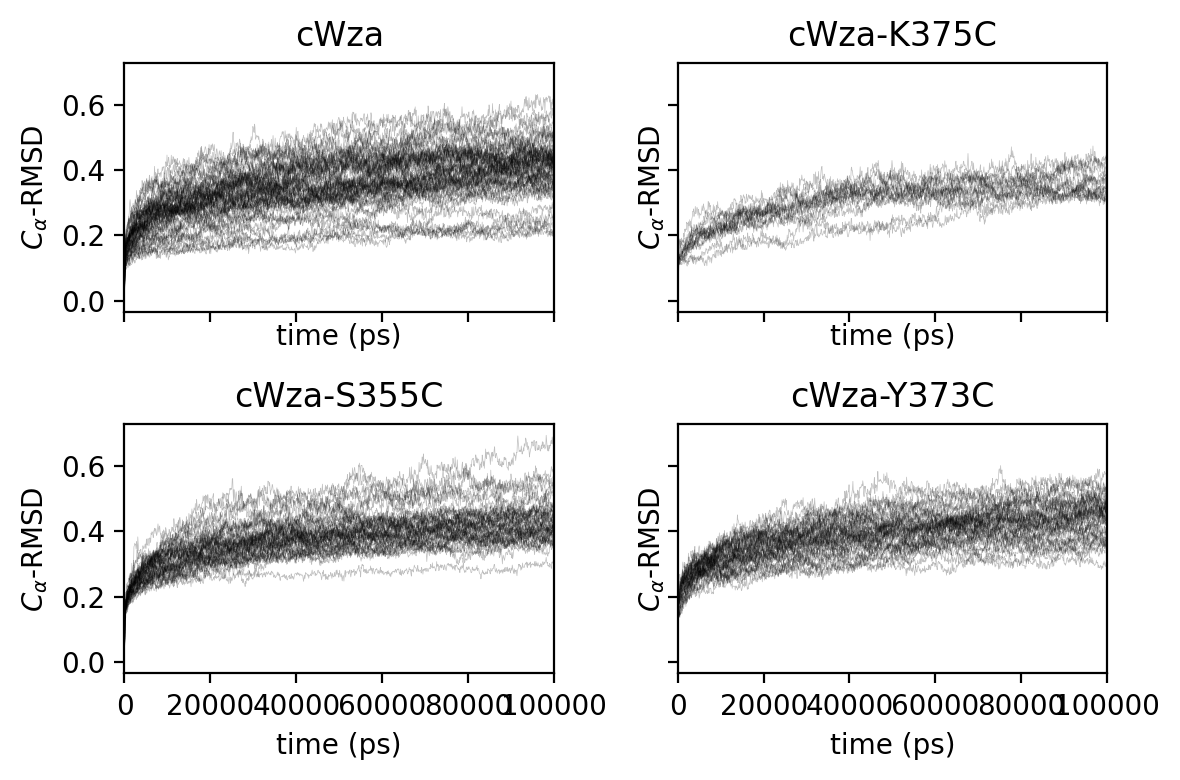

In [70]:
fig, ax = plt.subplots(2, 2, dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

for mutant in mutant_names:
    ax = Axes[mutant]
    files = glob.glob(data_folder+mutant+'_*rmsd_C-alpha.xvg')

    for path in files:
        data = [clean_line(l) for l in open(
            path, 'r').readlines() if exclude_regex(l)]
        data = np.array(data)

        ax.plot(*data.T, color="k", lw=0.25, alpha=0.25)

#     ax.plot([],[],color="k",label="all models")

    ax.set_title(mutant)
    ax.set_xlabel("time (ps)", fontsize=10)
    ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=10)

    ax.set_xlim(0, 100000)
#     ax.legend(loc="best",fontsize=10)

fig.tight_layout()
plt.show()

# Plot RMSD per mutant and conformation

In [2]:
data_folder = "data/md_traj_analysis/"

In [3]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [4]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

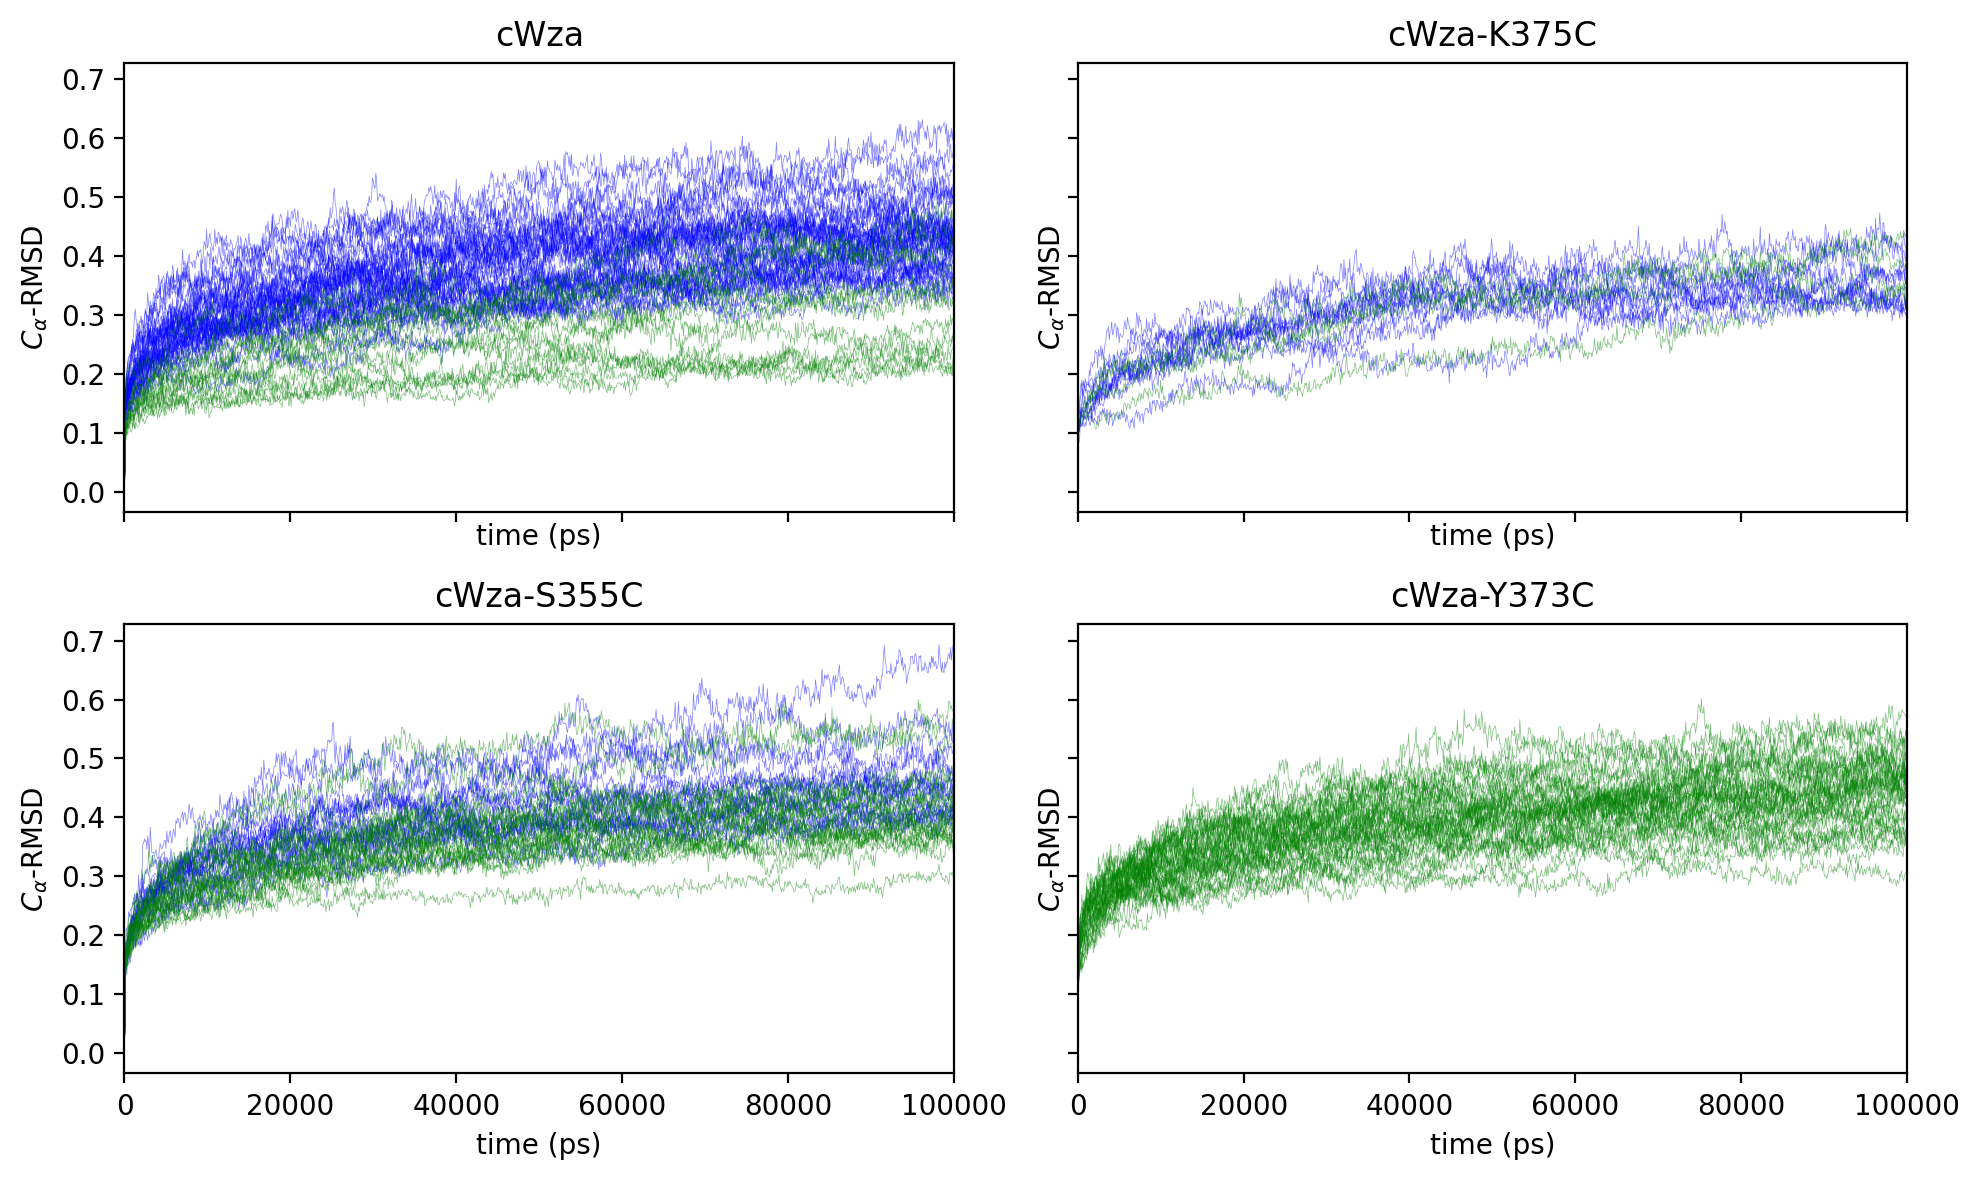

In [7]:
fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

for mutant in mutant_names:
    ax = Axes[mutant]
    for g in Conformations[mutant]: 
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)

            ax.plot(*data.T, color=Colors[g], lw=0.25, alpha=0.5)

#     ax.plot([],[],color="k",label="all models")

    ax.set_title(mutant)
    ax.set_xlabel("time (ps)", fontsize=10)
    ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=10)

    ax.set_xlim(0, 100000)
#     ax.legend(loc="best",fontsize=10)

fig.tight_layout()
plt.show()

# Mean RMSD distributions last 10ns

In [57]:
data_folder = "data/md_traj_analysis/"

In [58]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [59]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

## Distribution from joint RMSD trajectory data

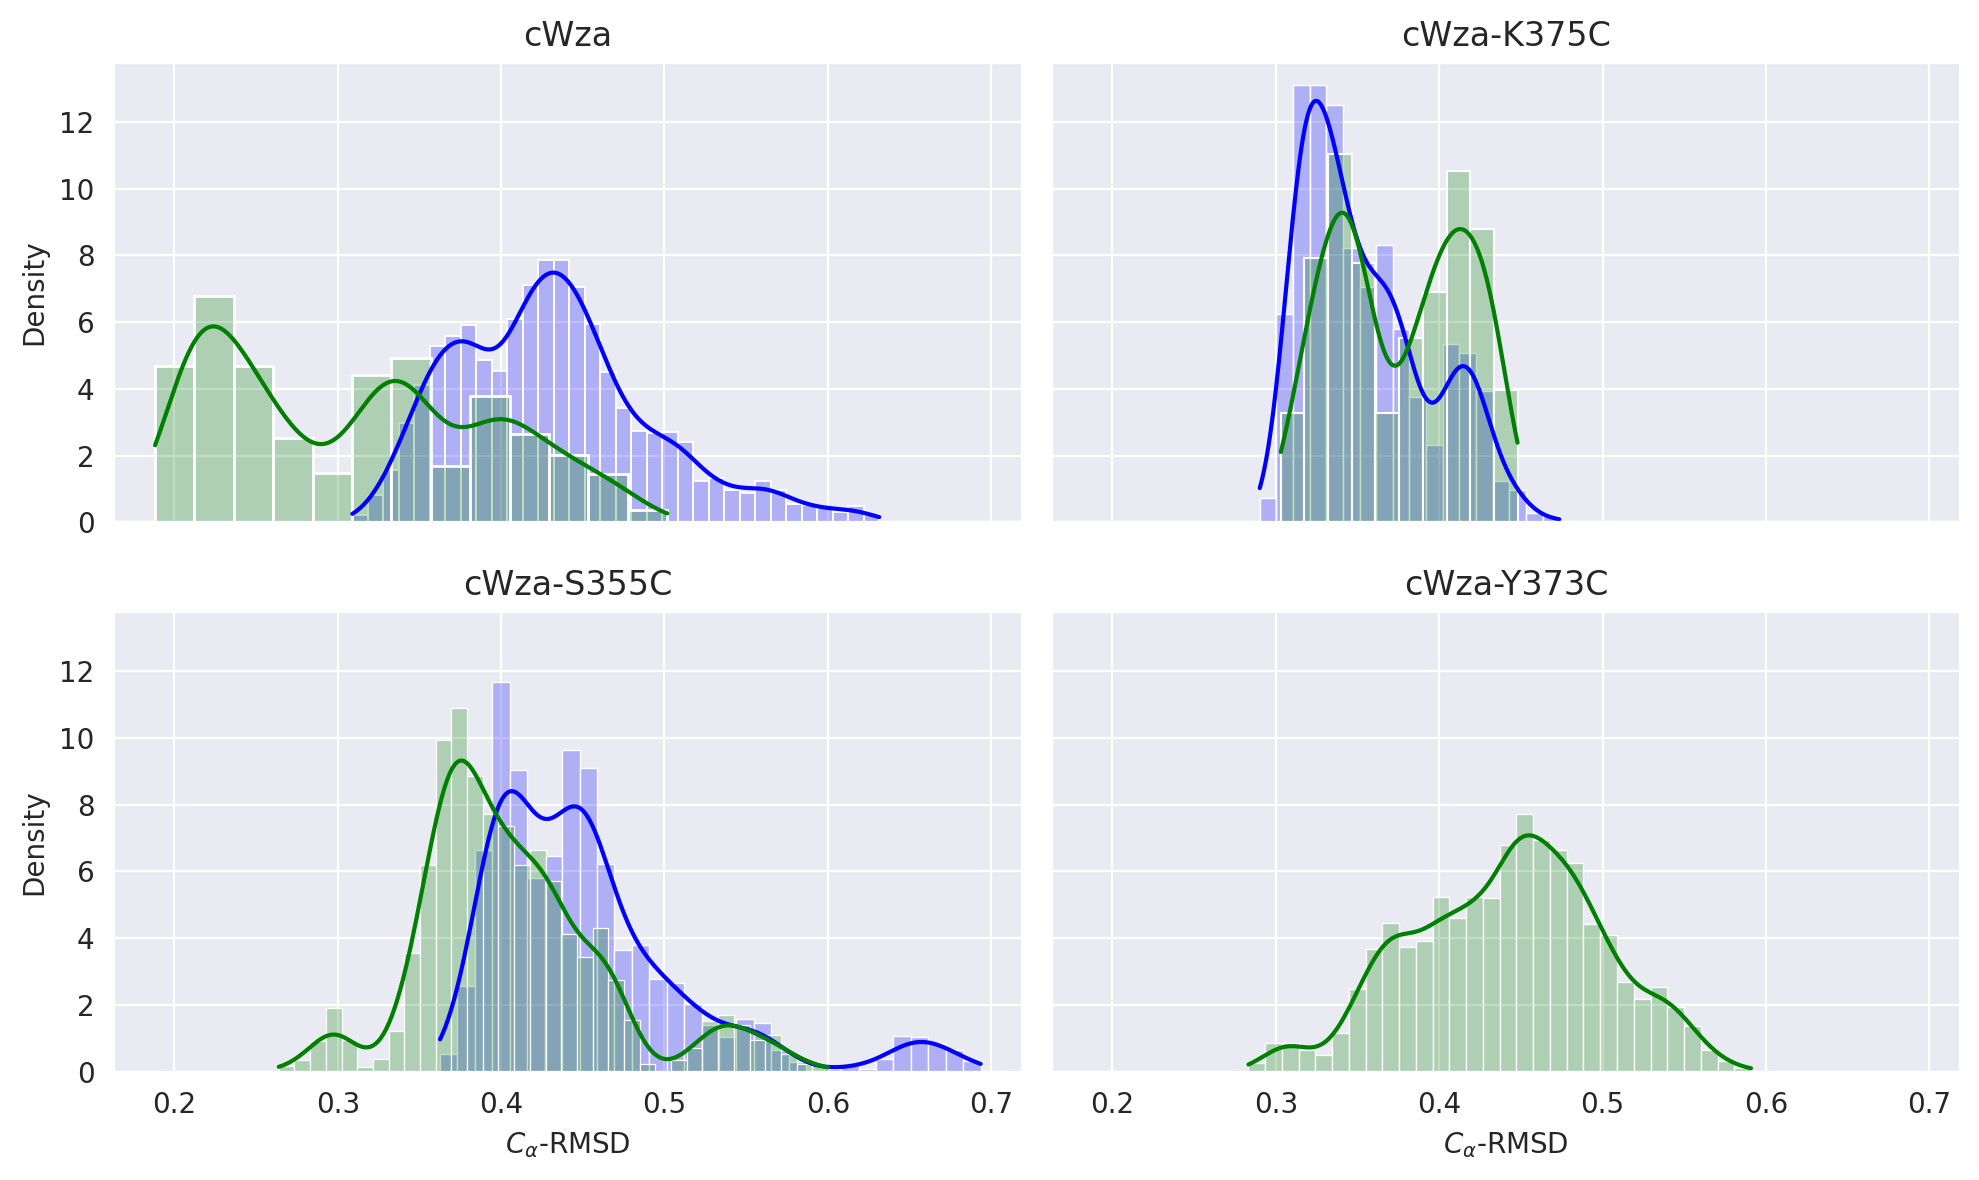

In [84]:
fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

time_threshold_ps = 90000

for mutant in mutant_names:
    ax = Axes[mutant]
    
    for g in Conformations[mutant]:
        
        data_last_10ns = []
        
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)
            
            time, value = data.T
            data_last_10ns = data_last_10ns + list(data[time > time_threshold_ps].T[-1])

        sns.histplot(data=data_last_10ns, stat="density", kde=True, color=Colors[g], alpha=0.25, ax=ax)

    ax.set_title(mutant)
    ax.set_xlabel("$C_\\alpha$-RMSD", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

fig.tight_layout()
plt.show()

## Distribution from mean RMSD trajectory data

/home/ba13026/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ba13026/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ba13026/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ba13026/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


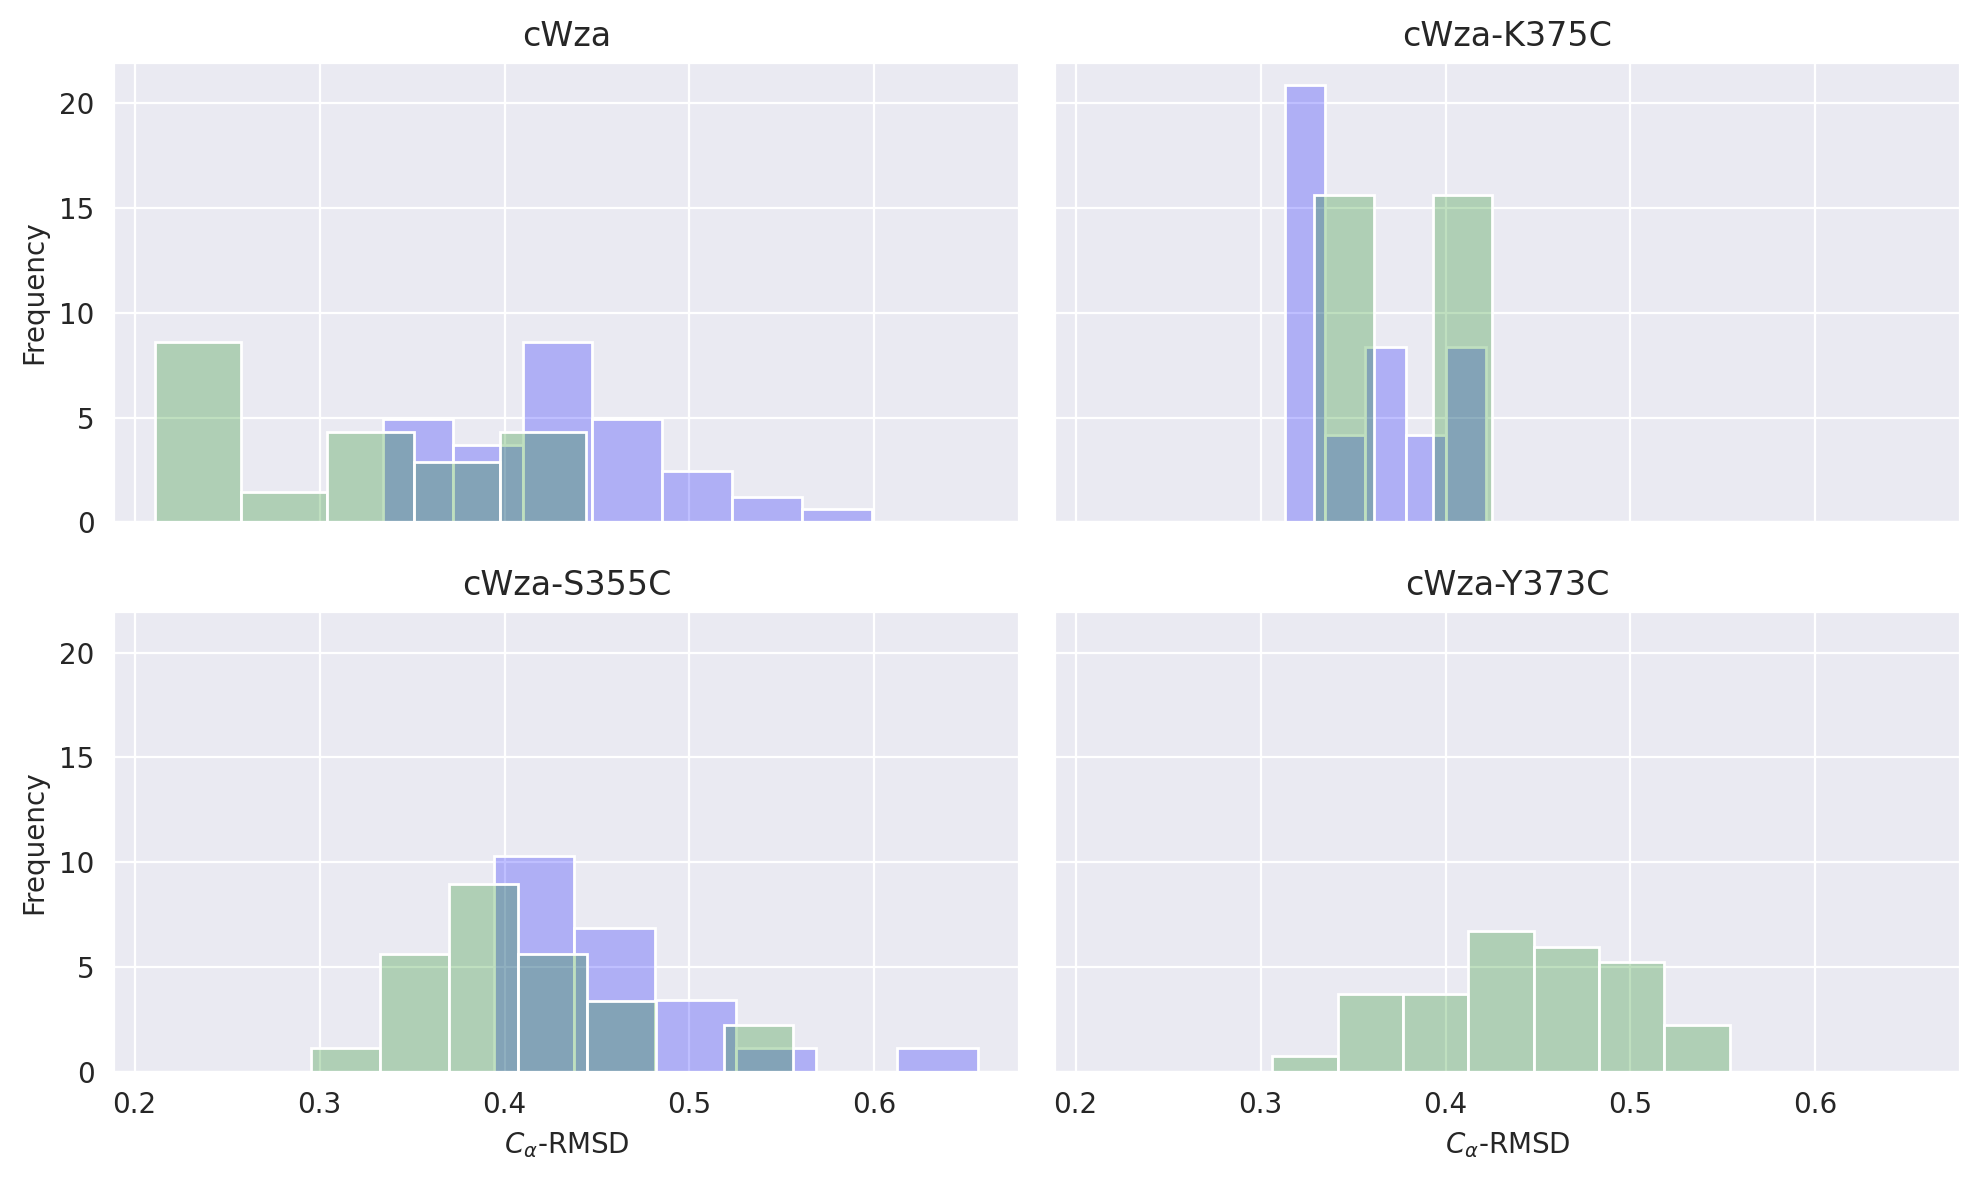

In [86]:
fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

for mutant in mutant_names:
    ax = Axes[mutant]
    
    for g in Conformations[mutant]:
        
        data_last_10ns = []
        
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)
            
            time, value = data.T
            data_last_10ns.append( np.mean(data[time > 90000].T[-1]) )

        sns.histplot(data=data_last_10ns, stat="density", color=Colors[g], alpha=0.25, ax=ax)

    ax.set_title(mutant)
    ax.set_xlabel("$C_\\alpha$-RMSD", fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)

fig.tight_layout()
plt.show()

# Plot RMSF per mutant and conformation

In [2]:
data_folder = "data/md_traj_analysis/"

In [3]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [4]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

## Raw data

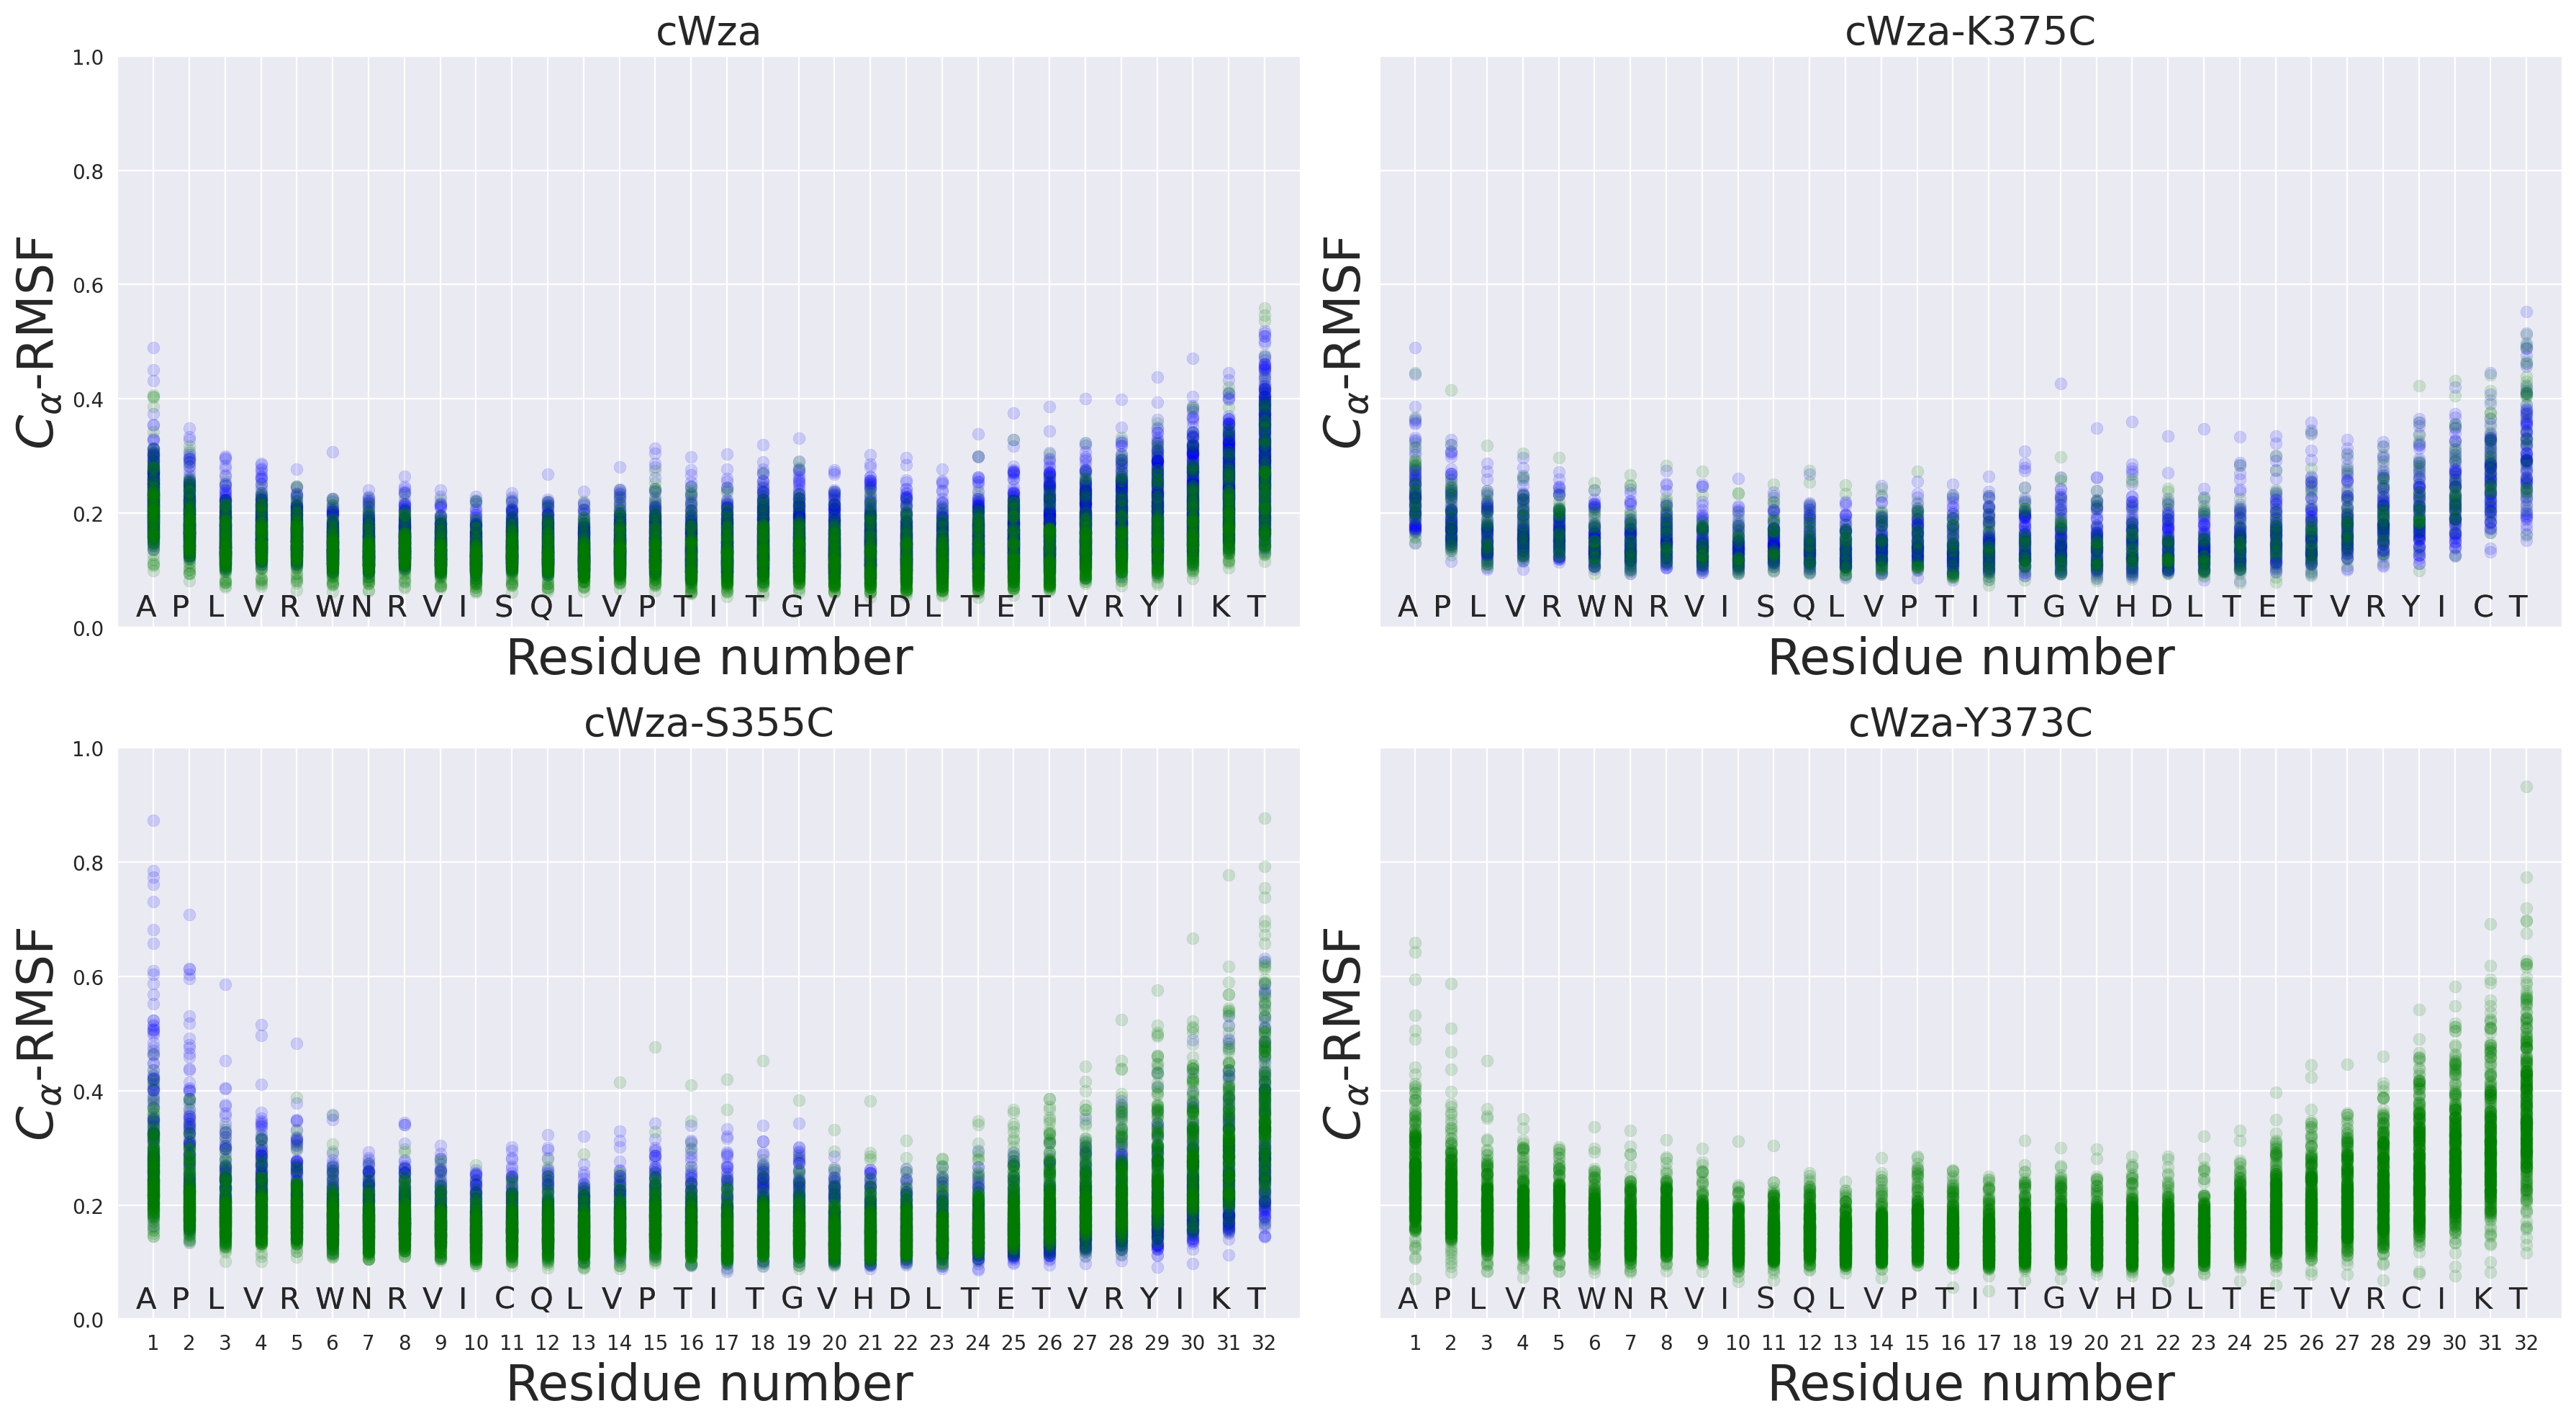

In [55]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2,figsize=(18,10),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

Sequences = {
    'cWza': 'APLVRWNRVISQLVPTITGVHDLTETVRYIKT',
    'cWza-K375C' : 'APLVRWNRVISQLVPTITGVHDLTETVRYICT',
    'cWza-S355C': 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT',
    'cWza-Y373C': 'APLVRWNRVISQLVPTITGVHDLTETVRCIKT'
}

for mutant in mutant_names:
    ax = Axes[mutant]
    for g in Conformations[mutant]: 
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsf_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)

            ax.scatter(*data.T, color=Colors[g], lw=0.25, alpha=0.15)

        ax.set_xticks(range(1,33))
        for resn in range(32):
            ax.text(resn+0.5, 0.02,Sequences[mutant][resn],fontsize=15)

    ax.set_title(mutant, fontsize=20)
    ax.set_xlabel("Residue number", fontsize=25)
    ax.set_ylabel("$C_\\alpha$-RMSF", fontsize=25)

ax.set_xlim(0, 33)
ax.set_ylim(0, 1)

fig.tight_layout()
plt.show()

## Averaged data

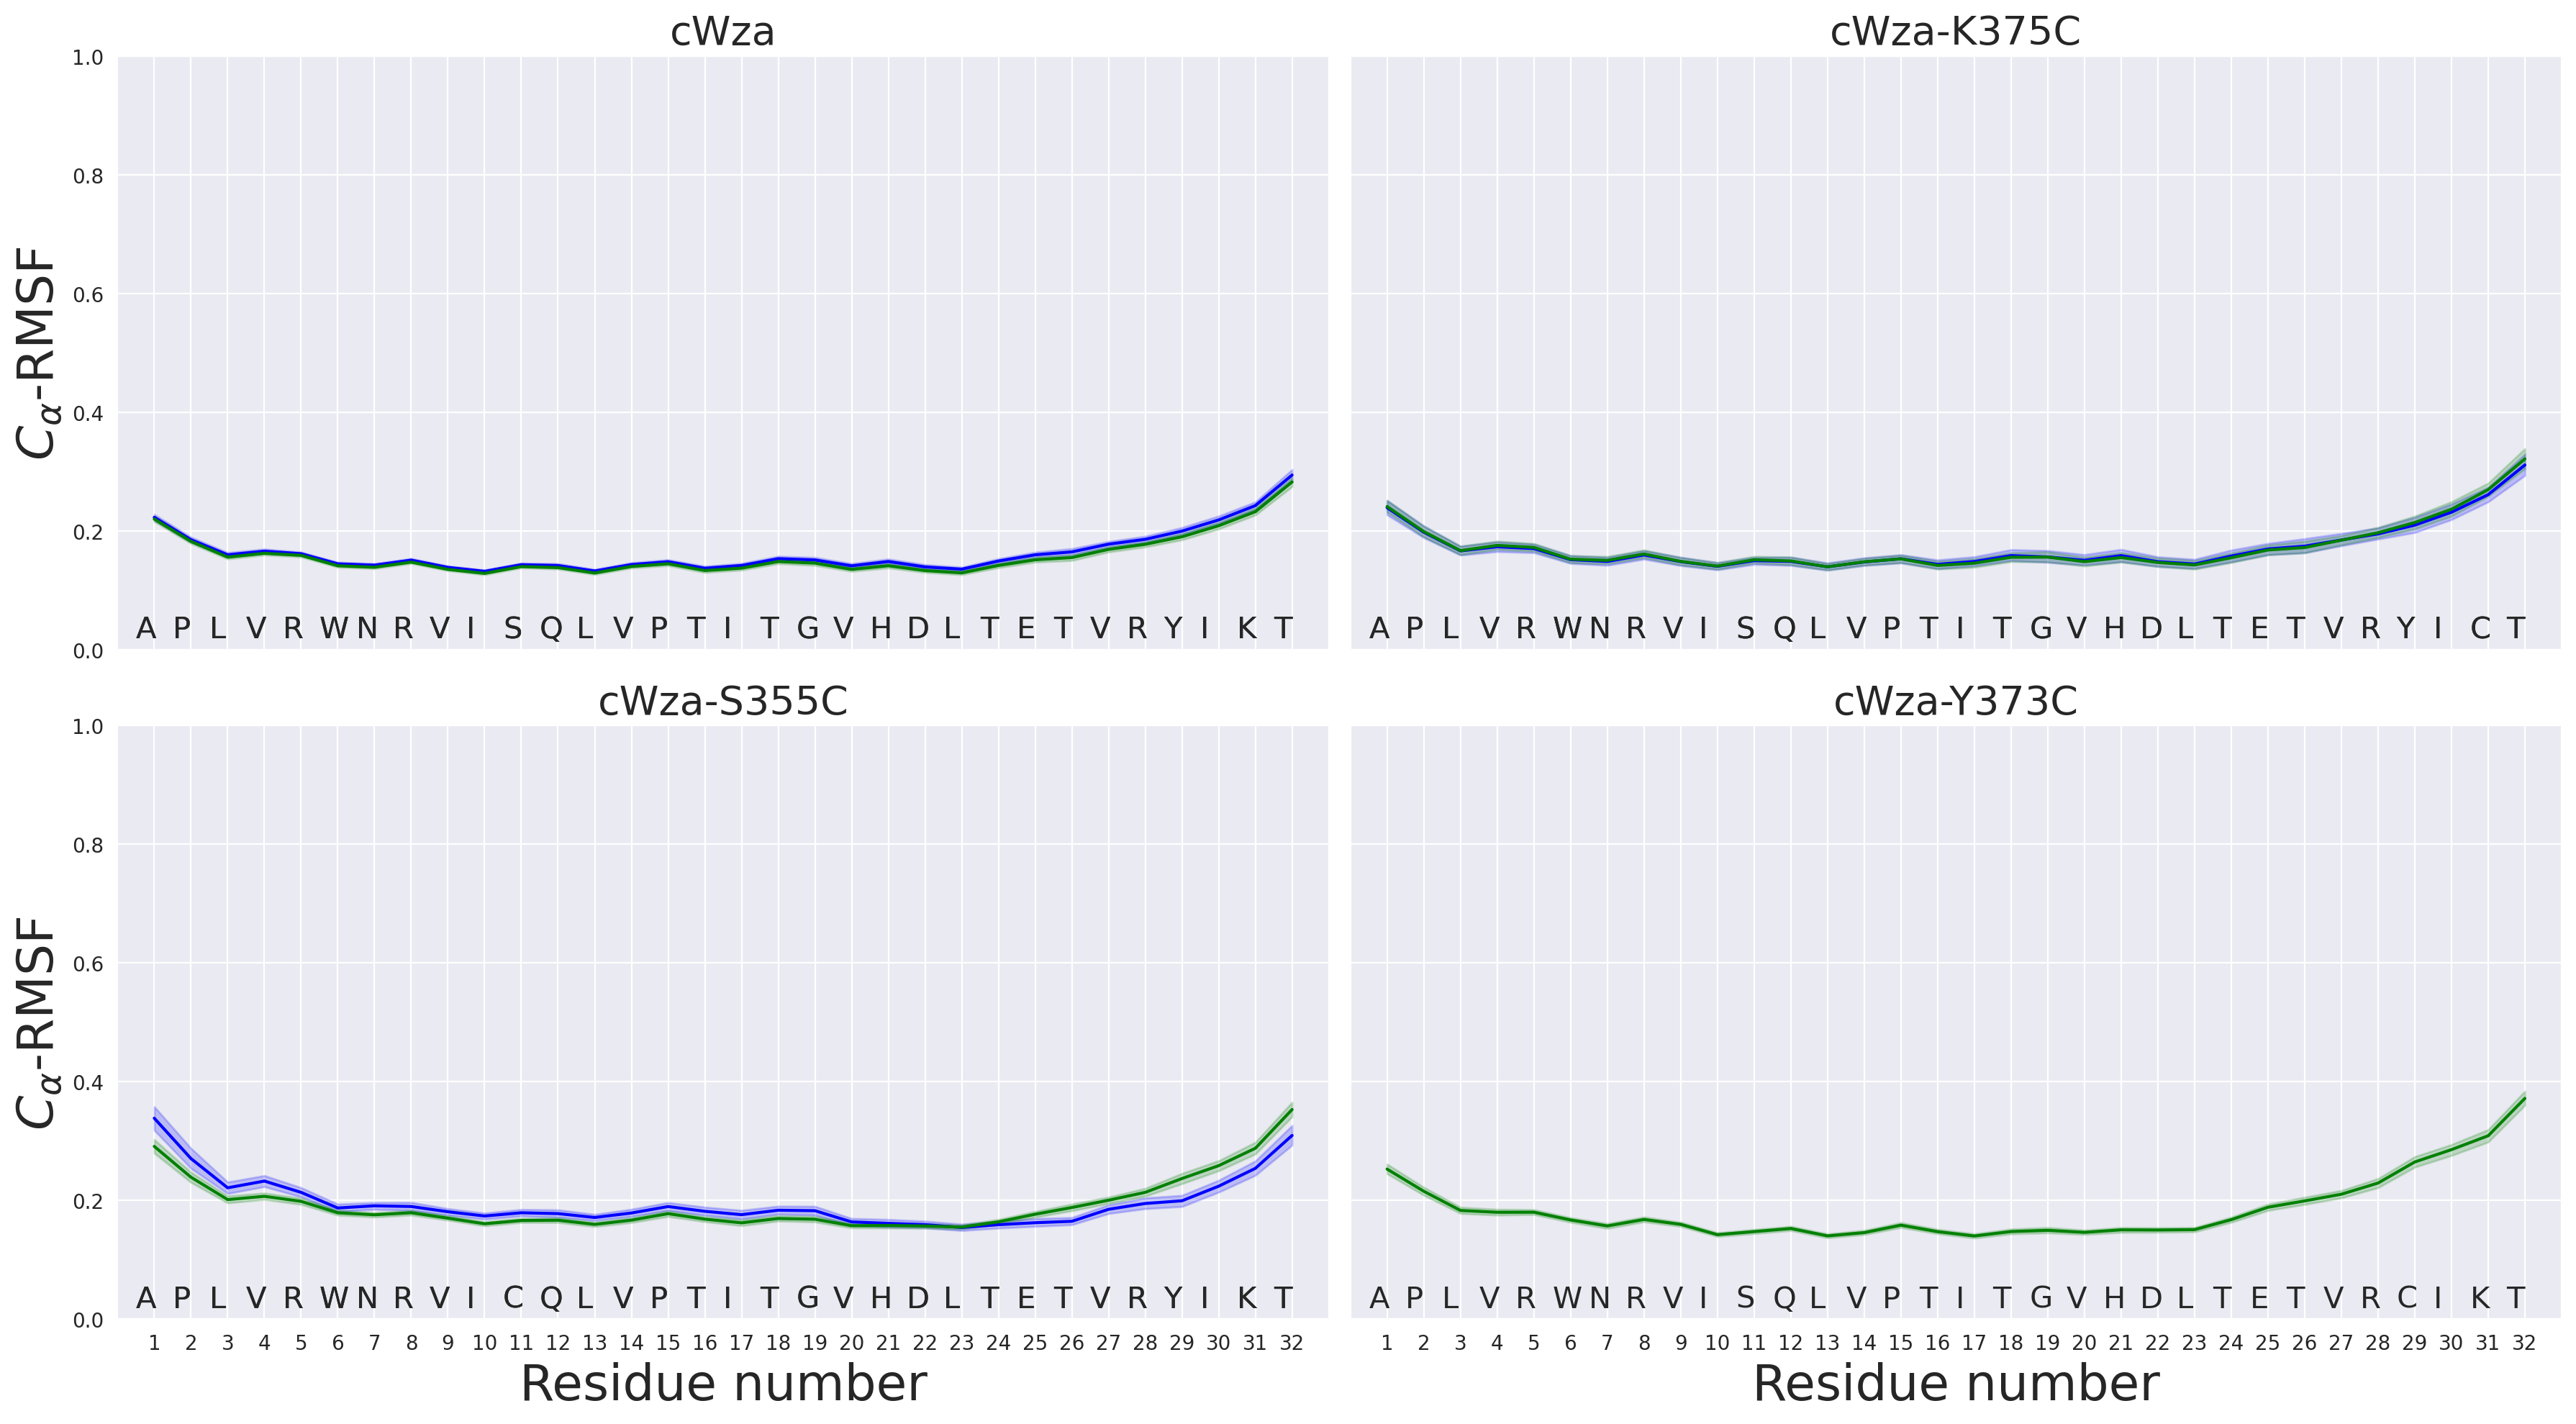

In [56]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2,figsize=(18,10),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

Sequences = {
    'cWza': 'APLVRWNRVISQLVPTITGVHDLTETVRYIKT',
    'cWza-K375C' : 'APLVRWNRVISQLVPTITGVHDLTETVRYICT',
    'cWza-S355C': 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT',
    'cWza-Y373C': 'APLVRWNRVISQLVPTITGVHDLTETVRCIKT'
}

test_data = {}

for mutant in mutant_names:
    ax = Axes[mutant]
    test_data['residue'] = []
    test_data['rmsf'] = []
    
    for g in Conformations[mutant]: 
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsf_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)] 
            data = np.array(data).T
            X = data[0]; Y = data[1]
            test_data['residue'] = test_data['residue'] + list(X)
            test_data['rmsf'] = test_data['rmsf'] + list(Y)

        df = pd.DataFrame(test_data)
        sns.lineplot(x='residue',y='rmsf',data = df,color=Colors[g], ax=ax)
        ax.set_xticks(range(1,33))
        for resn in range(32):
            ax.text(resn+0.5, 0.02,Sequences[mutant][resn],fontsize=15)

    ax.set_title(mutant, fontsize=20)
    ax.set_xlabel("Residue number", fontsize=25)
    ax.set_ylabel("$C_\\alpha$-RMSF", fontsize=25)

ax.set_xlim(0, 33)
ax.set_ylim(0, 1)

fig.tight_layout()
plt.show()

# <span style="color:red">__TO-DOs__</span>

* Plot RMSD distributions for last 10ns of MD per mutant and per conformation
* Work out mean RMSD for last 10ns per model and filter according to a threshold to map their identity
* Start plotting RMSF data as done for RMSD